# Répartition des valeurs moyennes par station et choix de protocole

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
# Définition des paramètres esthétiques généraux

sns.set_theme(style = "whitegrid", palette = "bright")
sns.set()

df = pd.read_csv("../../data/raw/weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [2]:
num = df.select_dtypes(float).copy()
num['Location'] = df['Location']
mean = num.groupby('Location').mean()
mean.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,49.000000,49.000000,49.000000,33.000000,30.000000,47.000000,49.000000,49.000000,49.000000,49.000000,45.000000,45.000000,37.000000,37.000000,49.000000,49.000000
mean,12.258711,23.388345,2.340112,5.476532,7.638842,40.093952,14.084588,18.596080,68.694125,51.246693,1017.596989,1015.177681,4.586632,4.592432,17.051482,21.877344
std,3.950826,4.056094,1.141286,1.586903,0.978785,4.247852,4.009223,3.641727,8.979162,11.217162,1.556745,1.937681,1.076940,0.829306,4.129382,4.082139
min,3.577280,11.663676,0.490405,3.424808,6.381283,28.212881,5.978448,10.614354,39.690155,24.127700,1011.888784,1008.349107,2.518027,2.891489,6.815185,10.209180
25%,9.363242,20.769358,1.619380,4.399672,6.664011,37.600106,10.822970,15.562892,64.043587,44.919263,1017.684084,1015.214643,3.854989,4.012667,13.845275,19.395181
50%,12.303850,23.001975,2.087562,5.253797,7.486744,40.085013,14.727452,18.993498,69.936821,51.827954,1018.030229,1015.859854,4.560184,4.501121,16.929046,21.557447
75%,14.437108,25.533234,3.144891,6.256891,8.491616,42.574929,16.474599,21.268285,74.805416,57.780180,1018.395130,1016.237047,5.314034,5.263298,18.773480,23.771603
max,23.209305,34.935436,5.742035,10.141440,9.581944,47.530915,20.278923,25.861416,85.217907,69.722609,1018.986480,1016.803264,6.391001,6.285643,27.185625,33.546604


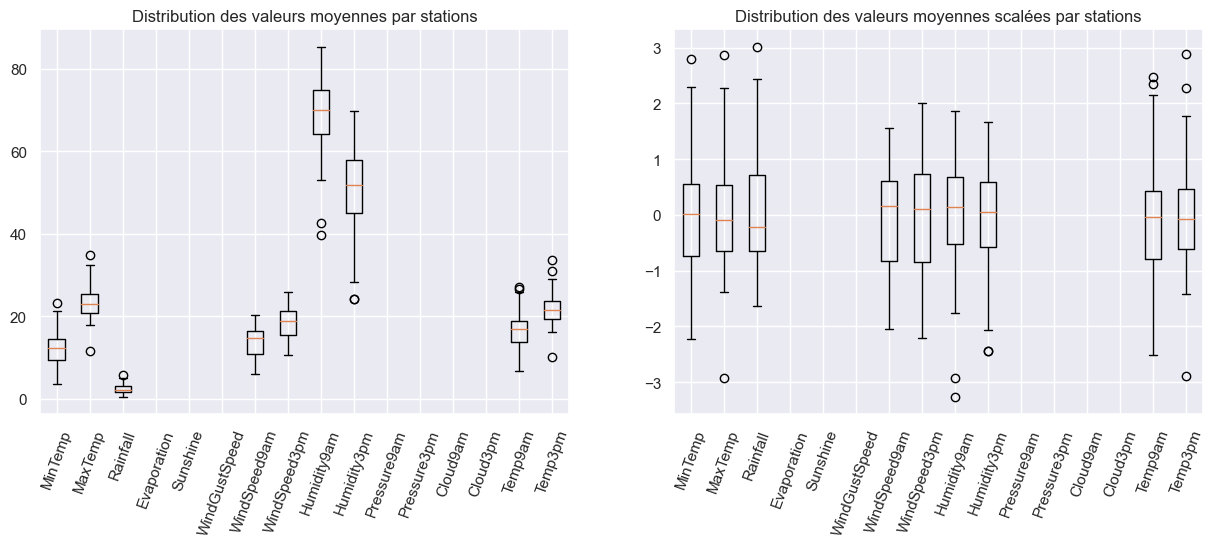

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mean_scaled = pd.DataFrame(scaler.fit_transform(mean))

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.boxplot([mean[col] for col in mean.columns])
plt.xticks(np.arange(1, 17), mean.columns)
plt.xticks(rotation = 70)
plt.title('Distribution des valeurs moyennes par stations')

plt.subplot(122)
plt.boxplot([mean_scaled[col] for col in mean_scaled.columns])
plt.xticks(np.arange(1, 17), mean.columns)
plt.xticks(rotation = 70)
plt.title('Distribution des valeurs moyennes scalées par stations')
plt.show()

# Bilan : les valeurs moyennes de chaque station sont assez dispersées, ce qui justifie la démarche de remplacer les nan par la valeur moyenne de la station,
# plutôt que par la valeur moyenne calculée pour l'ensemble des stations.

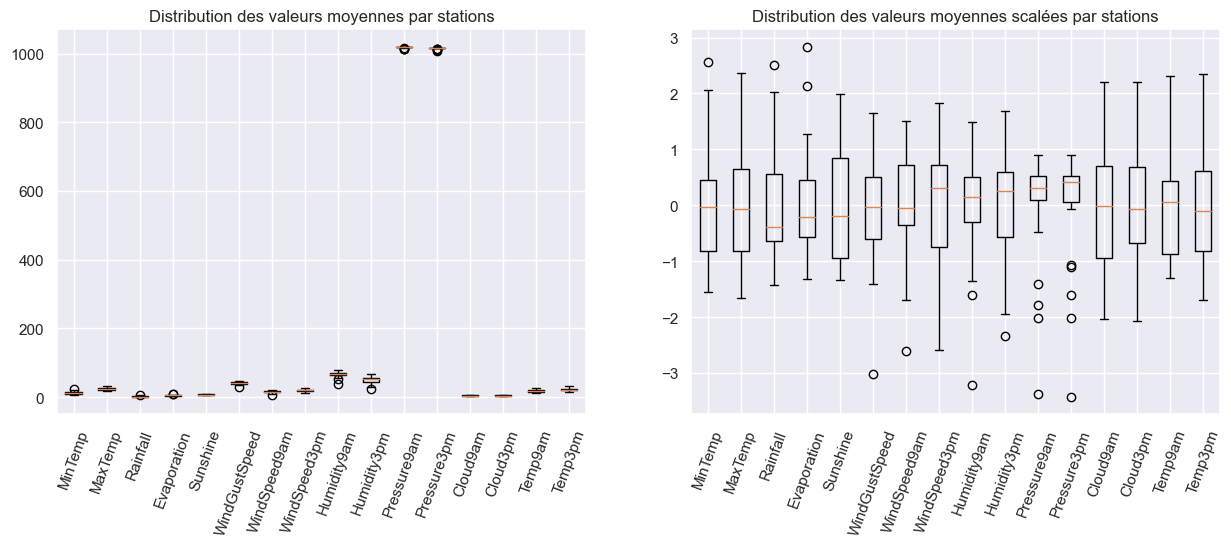

In [4]:
mean_dropped = mean.dropna().copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mean_scaled_dropped = pd.DataFrame(scaler.fit_transform(mean_dropped))

plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.boxplot([mean_dropped[col] for col in mean_dropped.columns])
plt.xticks(np.arange(1, 17), mean_dropped.columns)
plt.xticks(rotation = 70)
plt.title('Distribution des valeurs moyennes par stations')

plt.subplot(122)
plt.boxplot([mean_scaled_dropped[col] for col in mean_scaled_dropped.columns])
plt.xticks(np.arange(1, 17), mean_dropped.columns)
plt.xticks(rotation = 70)
plt.title('Distribution des valeurs moyennes scalées par stations')
plt.show()

# Bilan : L'analyse précédente reste vraie, même en enlevant tous les nans pour faire apparaitre la distribution des mesures qui n'étaient pas visible précédemment.